In [250]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
df = pd.read_csv('spotify_tracks.csv')
df

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False
...,...,...,...,...,...,...,...,...
6295,4uveHSzaz8YEbTF9j6QlCI,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25,180001,False
6296,4u15cjyziW2Ewn5Ek3082l,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False
6297,56pHPaTeX2O9aVmTFYS8hV,The Daintree,world-music,Joseph Tawadros,World Music,12,69533,False
6298,6Ldyc5TsR4kaUsuHKcB2AD,The Sorcerers Symphony,world-music,Future World Music,Behold,26,90001,False


In [252]:
df.isnull().sum()

id             0
name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


In [254]:
df.shape

(6300, 8)

In [255]:
df.drop('id', axis=1, inplace=True)

In [256]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,6300.0,30.754762,19.948991,0.0,16.0,29.0,45.0,90.0
duration_ms,6300.0,202847.735238,121029.858319,30060.0,147687.0,191607.0,236962.5,3601658.0


Genres


C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\102520106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')


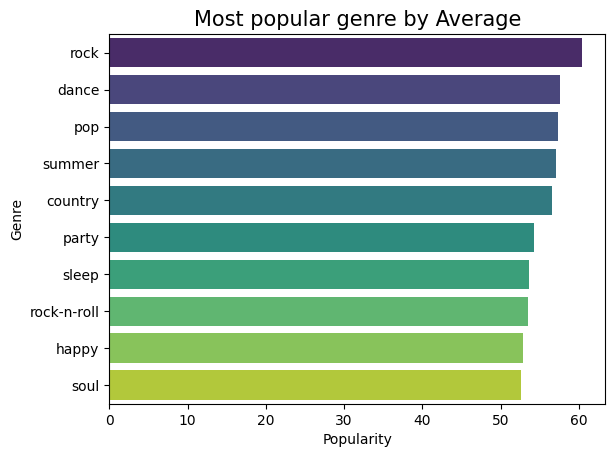

In [257]:
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')
plt.title('Most popular genre by Average', fontsize=15)
plt.xlabel('Popularity')
plt.ylabel('Genre')
plt.show()

Artists


In [258]:
df['artists'] = df['artists'].str.split(', ')
df = df.explode('artists').reset_index(drop=True)

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\2434912983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_artists.values, y=most_artists.index, palette='mako')


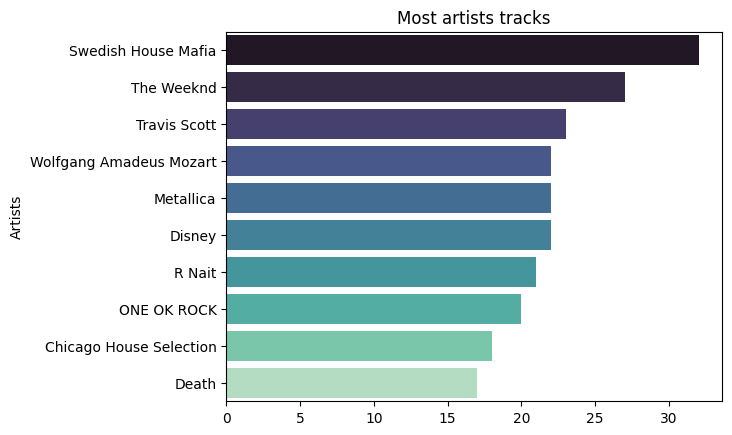

In [259]:
most_artists = df['artists'].value_counts().head(10)
sns.barplot(x=most_artists.values, y=most_artists.index, palette='mako')
plt.title('Most artists tracks')
plt.ylabel('Artists')
plt.show()

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\2831514142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_popular_artists.values, y=most_popular_artists.index, palette='mako')


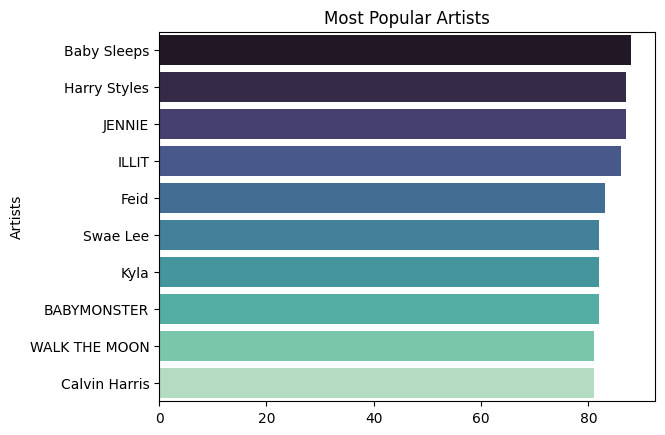

In [260]:
most_popular_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=most_popular_artists.values, y=most_popular_artists.index, palette='mako')
plt.title('Most Popular Artists')
plt.ylabel('Artists')
plt.show()

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\1003370337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_album.values, y=most_album.index, palette='viridis')


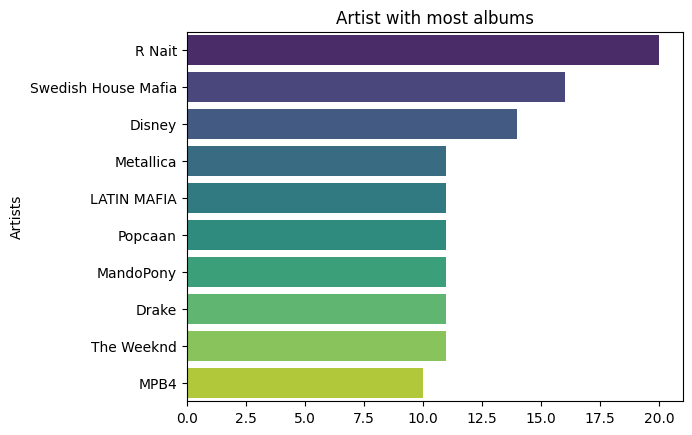

In [261]:
most_album = df.groupby('artists')['album'].nunique().sort_values(ascending=False).head(10)
sns.barplot(x=most_album.values, y=most_album.index, palette='viridis')
plt.title('Artist with most albums')
plt.ylabel('Artists')
plt.show()

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\2199890500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_durations.values, y=most_durations.index, palette='viridis')


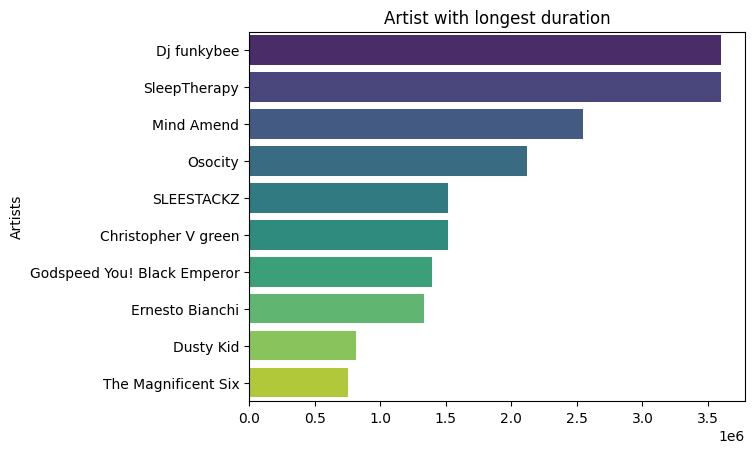

In [262]:
most_durations = df.groupby('artists')['duration_ms'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=most_durations.values, y=most_durations.index, palette='viridis')
plt.title('Artist with longest duration')
plt.ylabel('Artists')
plt.show()   

Explicit Songs


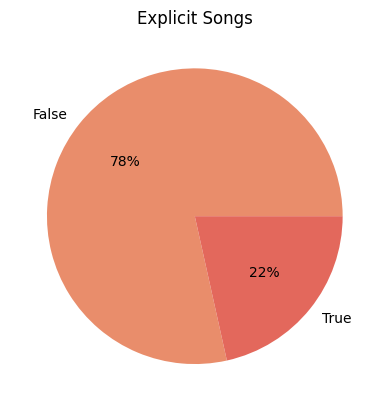

In [263]:
val = df['explicit'].value_counts()
color = sns.color_palette('flare')
plt.pie(val, labels=val.index, autopct='%1.f%%', colors=color)
plt.title('Explicit Songs')
plt.show()

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\390197490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=track_popularity.index, y=track_popularity.values, palette='flare')


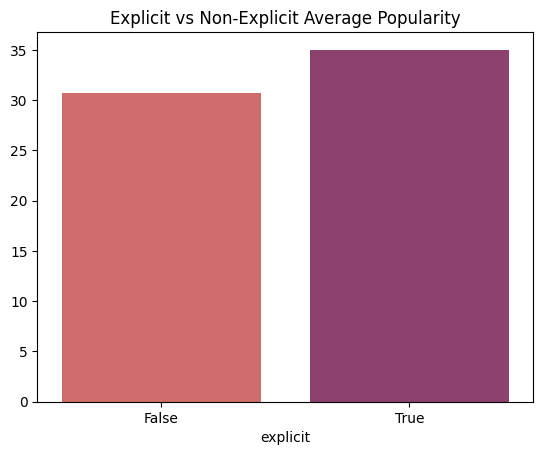

In [264]:
track_popularity = df.groupby('explicit')['popularity'].mean()
sns.barplot(x=track_popularity.index, y=track_popularity.values, palette='flare')
plt.title('Explicit vs Non-Explicit Average Popularity')
plt.show()

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\3673343406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adult_popularity.values, y=adult_popularity.index, palette='flare')


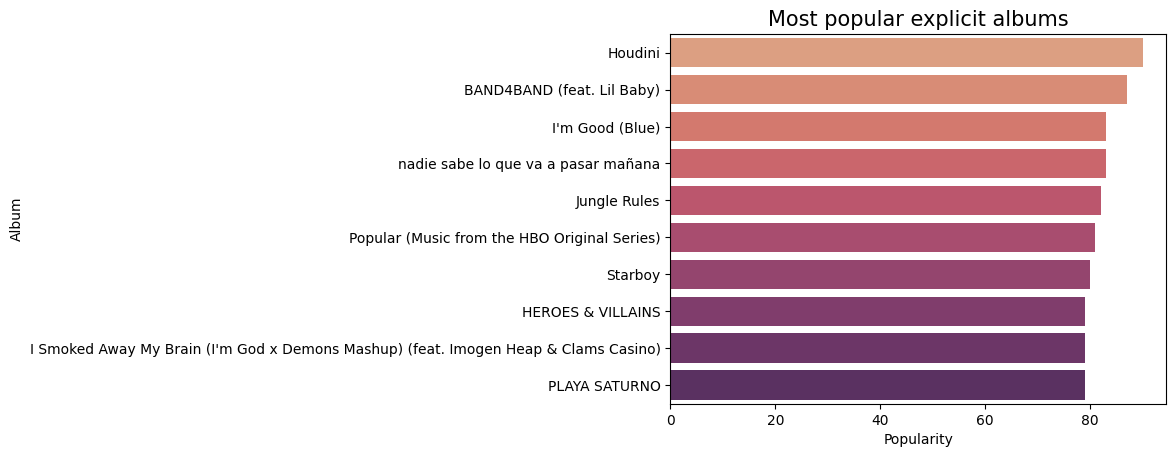

In [265]:
explicit_albums = df[df['explicit']==True]
adult_popularity = explicit_albums.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=adult_popularity.values, y=adult_popularity.index, palette='flare')
plt.title('Most popular explicit albums', fontsize=15)
plt.xlabel('Popularity')
plt.ylabel('Album')
plt.show()

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\2925151017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=explicit_artists.values, y=explicit_artists.index, palette='flare')


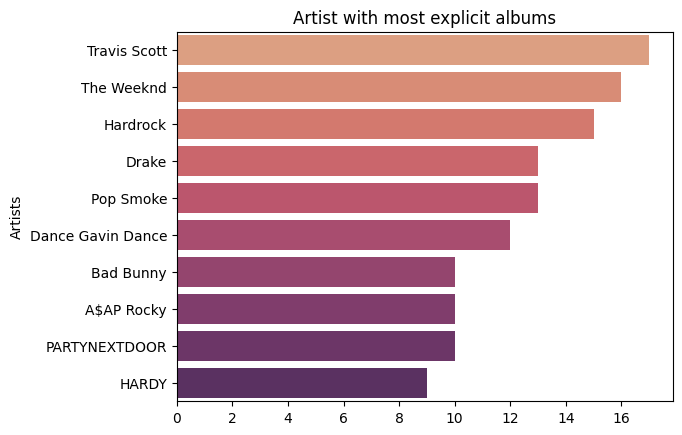

In [266]:
explicit_artists = explicit_albums.value_counts('artists').head(10)
sns.barplot(x=explicit_artists.values, y=explicit_artists.index, palette='flare')
plt.title('Artist with most explicit albums')
plt.ylabel('Artists')
plt.show()

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\2718620491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='name', data=non_exp_music, palette='viridis')


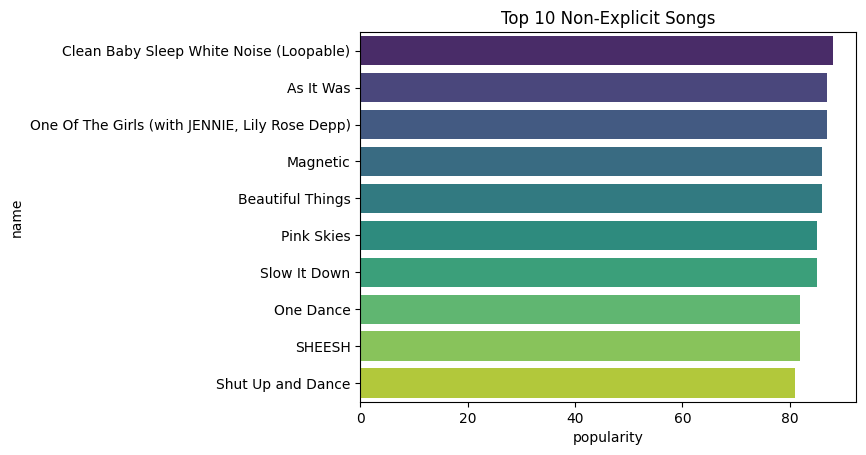

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\2718620491.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='name', data=exp_music, palette='flare')


<function matplotlib.pyplot.show(close=None, block=None)>

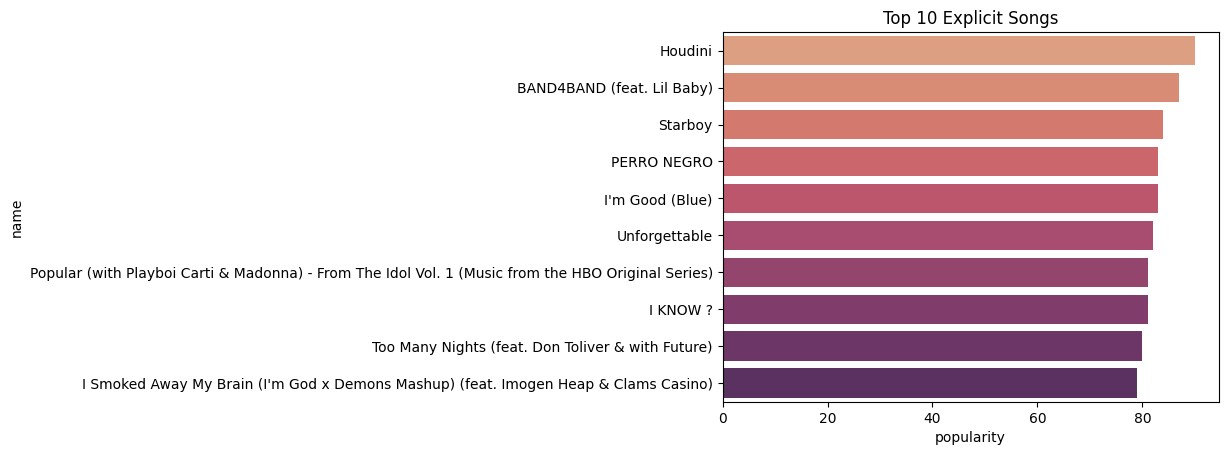

In [296]:
non_exp = df[df['explicit']==False]
non_exp_music = non_exp.sort_values('popularity', ascending=False).groupby('name').head(1)
non_exp_music = non_exp_music.head(10)

exp = df[df['explicit']==True]
exp_music = exp.sort_values('popularity', ascending=False).groupby('name').head(1)
exp_music = exp_music.head(10)

sns.barplot(x='popularity', y='name', data=non_exp_music, palette='viridis')
plt.title('Top 10 Non-Explicit Songs')
plt.show()

sns.barplot(x='popularity', y='name', data=exp_music, palette='flare')
plt.title('Top 10 Explicit Songs')
plt.show

Popularity


C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\3631823491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='name', data=top_10_songs, palette='mako')


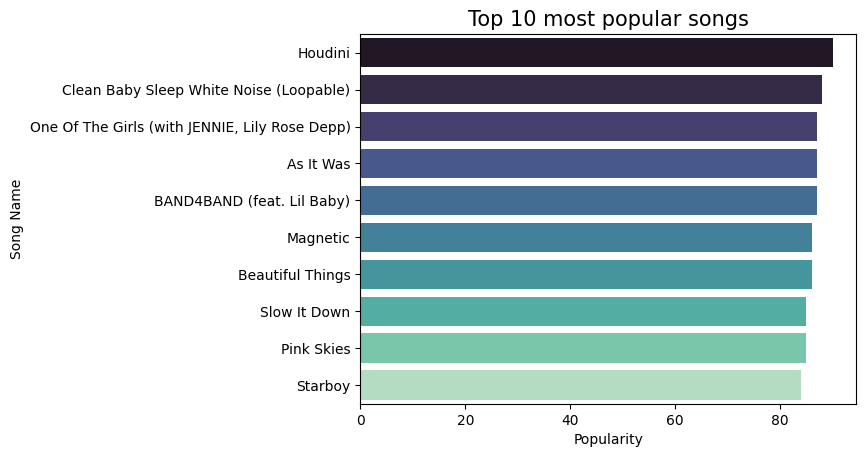

In [267]:
top_10_songs = df.sort_values('popularity', ascending=False).groupby('name').head(1)
top_10_songs = top_10_songs.head(10)
sns.barplot(x='popularity', y='name', data=top_10_songs, palette='mako')
plt.xlabel('Popularity')
plt.ylabel('Song Name')
plt.title('Top 10 most popular songs', fontsize=15)
plt.show()

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\3549296166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='album', data=top_10_albums, palette='crest')


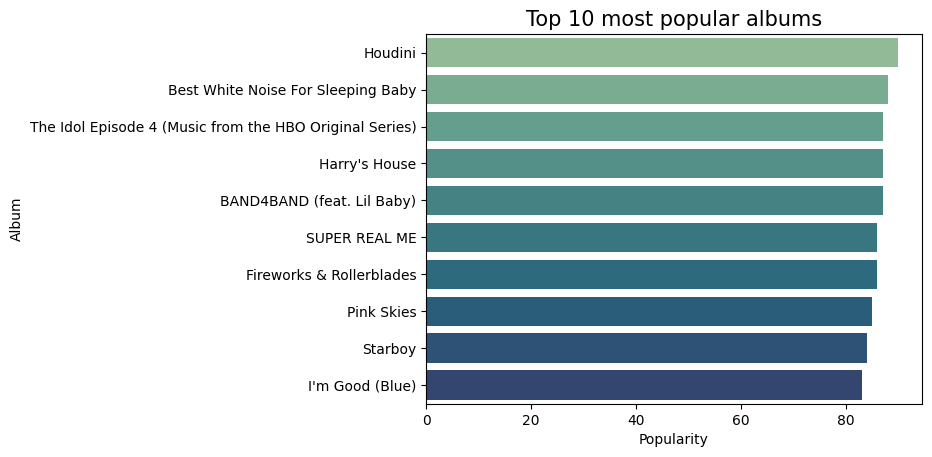

In [268]:
top_10_albums = df.sort_values('popularity', ascending=False).groupby('album').head(1)
top_10_albums = top_10_albums.head(10)
sns.barplot(x='popularity', y='album', data=top_10_albums, palette='crest')
plt.xlabel('Popularity')
plt.ylabel('Album')
plt.title('Top 10 most popular albums', fontsize=15)
plt.show()

Durations


C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\4160606864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_duration.values, y=artist_duration.index, palette='viridis')


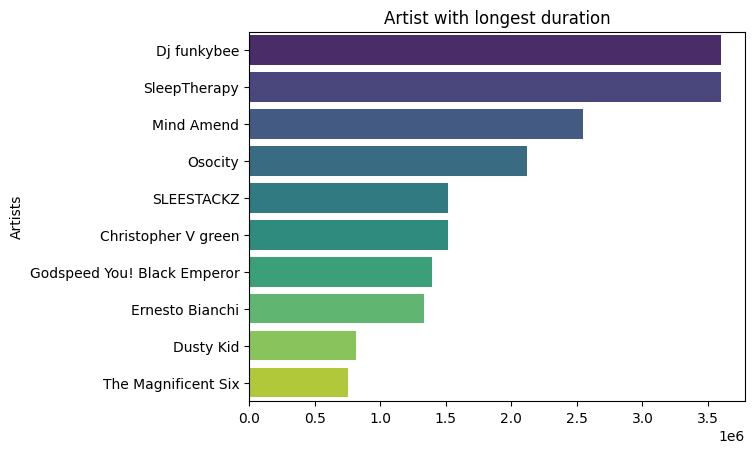

In [269]:
artist_duration = df.groupby('artists')['duration_ms'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=artist_duration.values, y=artist_duration.index, palette='viridis')
plt.title('Artist with longest duration')
plt.ylabel('Artists')
plt.show()

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\821893448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=longest_albums.values, y=longest_albums.index, palette='mako')


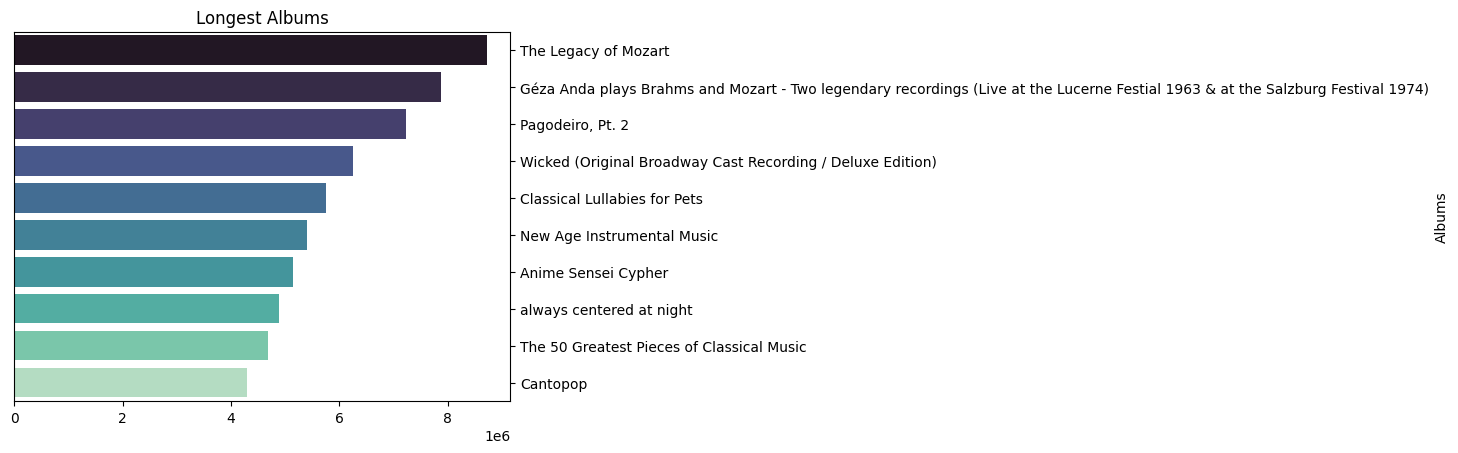

In [306]:
longest_albums = df.groupby('album')['duration_ms'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=longest_albums.values, y=longest_albums.index, palette='mako')
plt.title('Longest Albums')
plt.gca().yaxis.set_label_position('right')
plt.gca().yaxis.tick_right()
plt.ylabel('Albums')
plt.show()

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_20040\2587006260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration_ms', y='name',data=longest_songs, palette='flare')


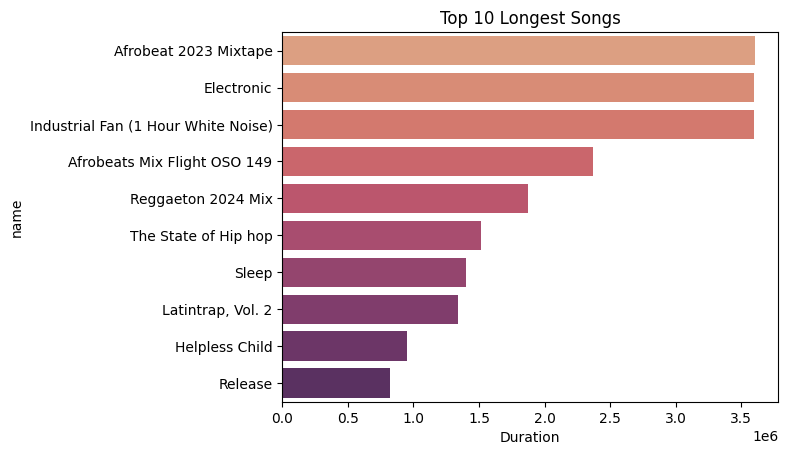

In [315]:
longest_songs = df.sort_values('duration_ms', ascending=False).groupby('name').head(1)
longest_songs = longest_songs.head(10)
sns.barplot(x='duration_ms', y='name',data=longest_songs, palette='flare')
plt.title('Top 10 Longest Songs')
plt.xlabel('Duration')
plt.show()

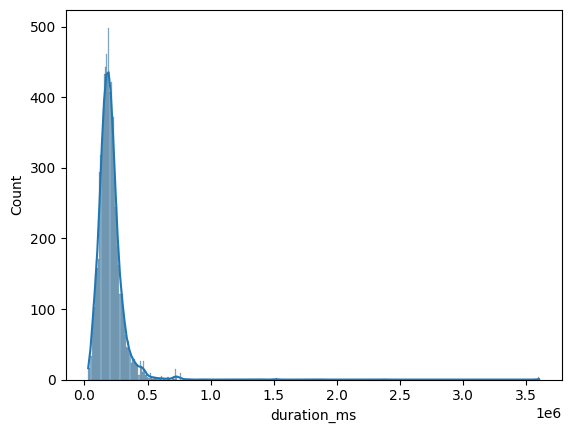

In [270]:
sns.histplot(df['duration_ms'], kde=True)
plt.show()

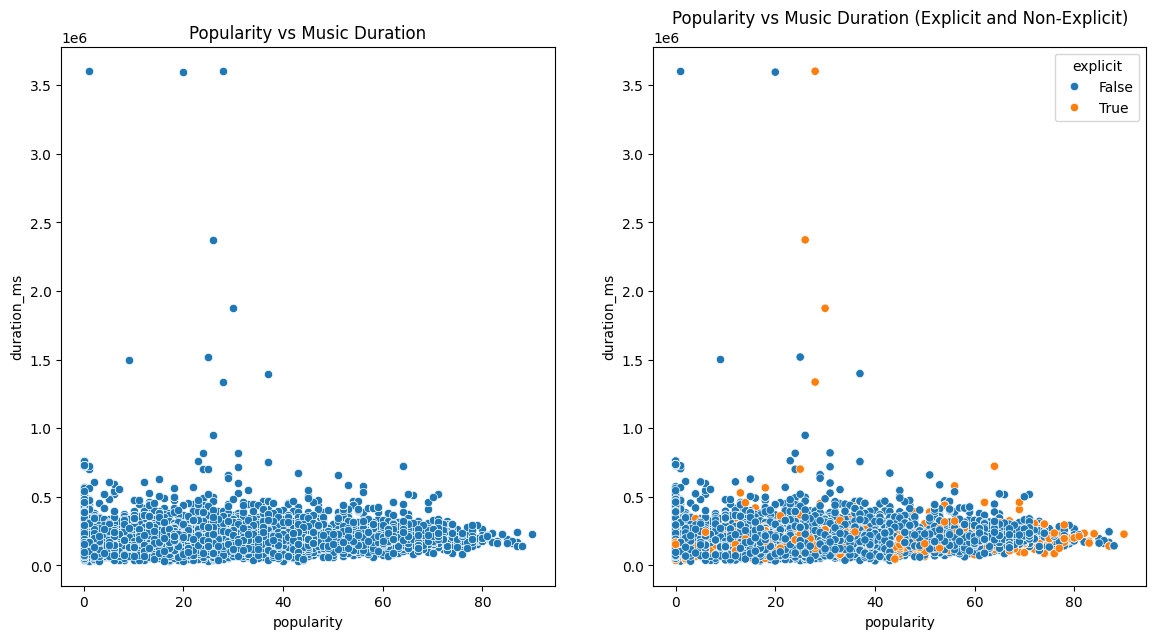

In [282]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.scatterplot(x='popularity', y='duration_ms', data=df, ax=ax[0])
ax[0].set_title('Popularity vs Music Duration')

sns.scatterplot(x='popularity', y='duration_ms', hue='explicit', data=df, ax=ax[1])
ax[1].set_title('Popularity vs Music Duration (Explicit and Non-Explicit)')

plt.show()

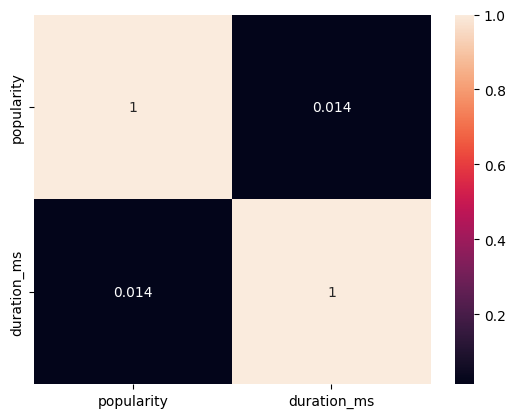

In [181]:
sns.heatmap(df[['popularity', 'duration_ms']].corr(), annot=True)
plt.show()